In [1]:
%load_ext autoreload
%autoreload 2

import transformer_lens

from lexical_reflections.utils.device import DEVICE

model = transformer_lens.HookedTransformer.from_pretrained("ai-forever/mGPT", device=DEVICE)

Loaded pretrained model ai-forever/mGPT into HookedTransformer


In [2]:
import json

toy_data = None
with open("../../data/toy_data.json") as f:
    toy_data = json.load(f)

Data len:  11


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
100%|██████████| 11/11 [00:02<00:00,  5.42it/s]


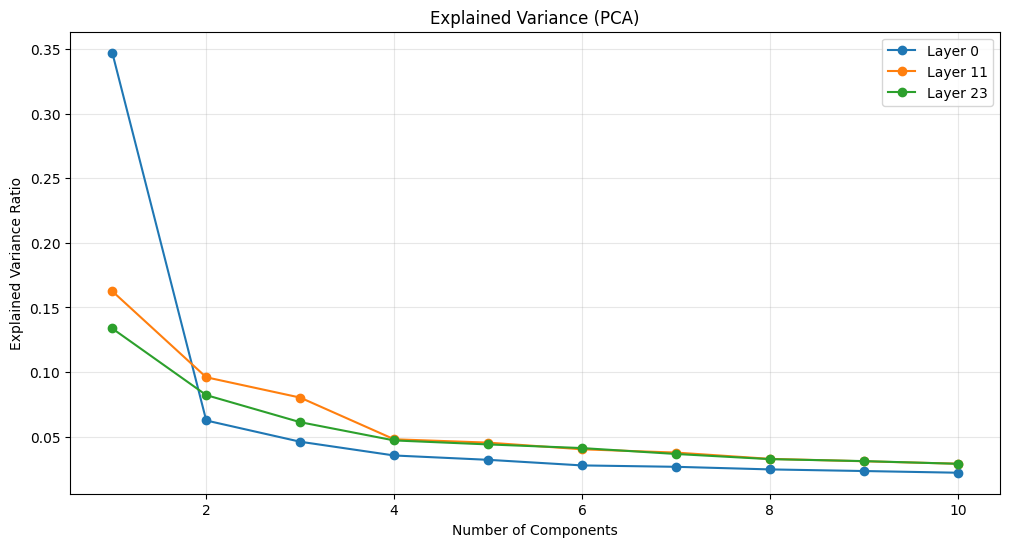

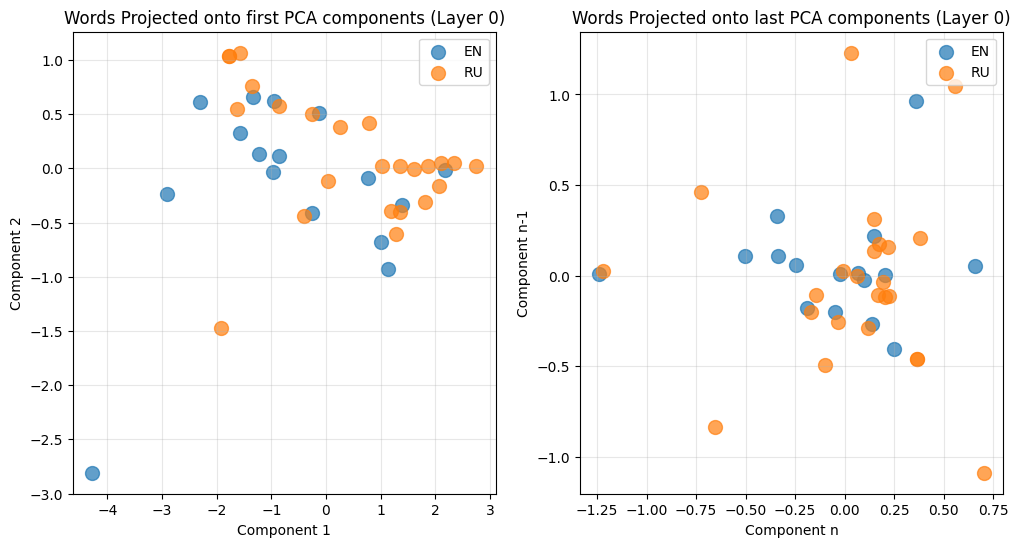

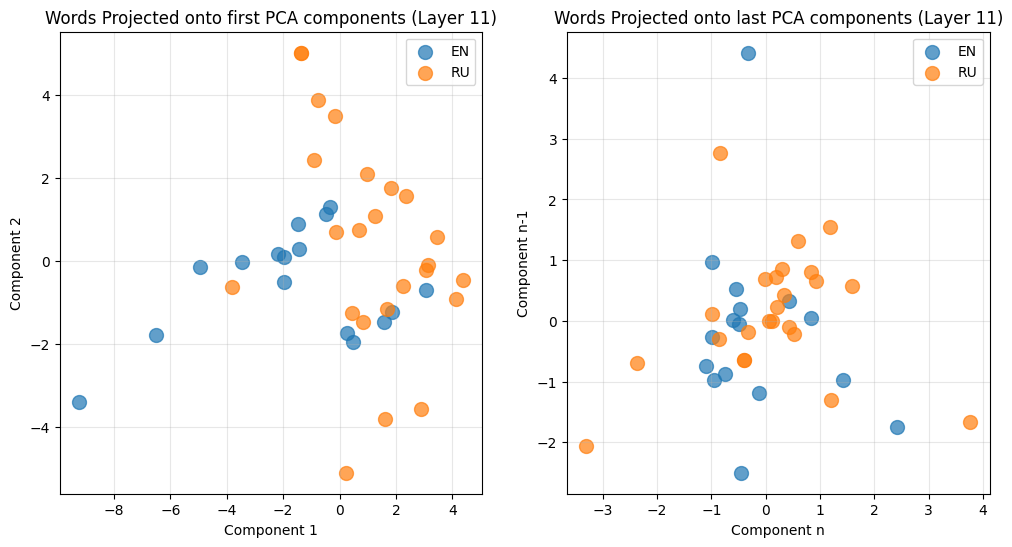

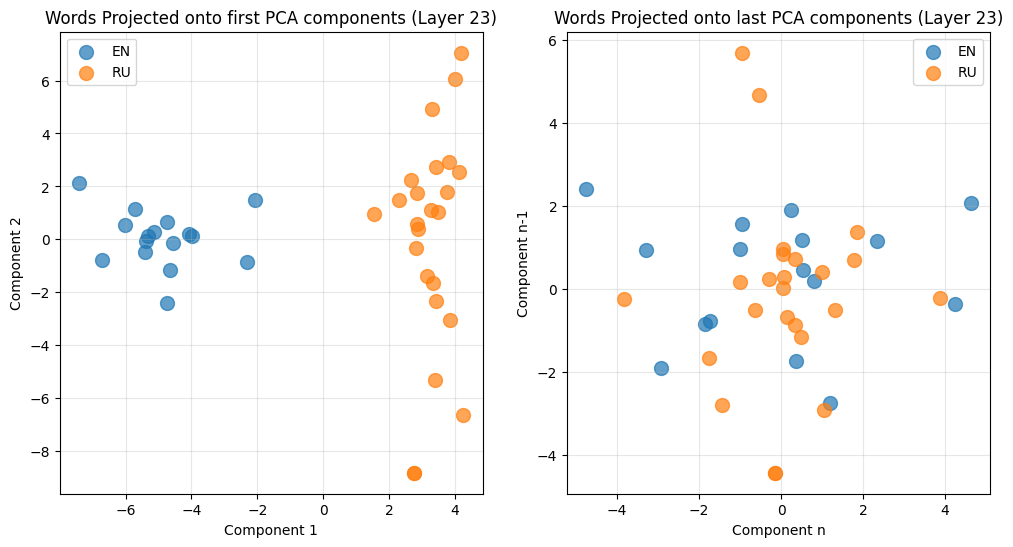

In [3]:
from lexical_reflections.gather_data.activation_cache import collect_activation_cache
from lexical_reflections.pca.analyze import find_lexical_subspace_intersection

cache = collect_activation_cache(model, toy_data)
find_lexical_subspace_intersection(model, cache)

In [4]:
from datasets import load_dataset

data_opus_books = load_dataset("Helsinki-NLP/opus_books", "en-ru")["train"].to_pandas()["translation"]

In [5]:
subset_opus_books = data_opus_books[:50]

Data len:  50


100%|██████████| 50/50 [00:15<00:00,  3.19it/s]


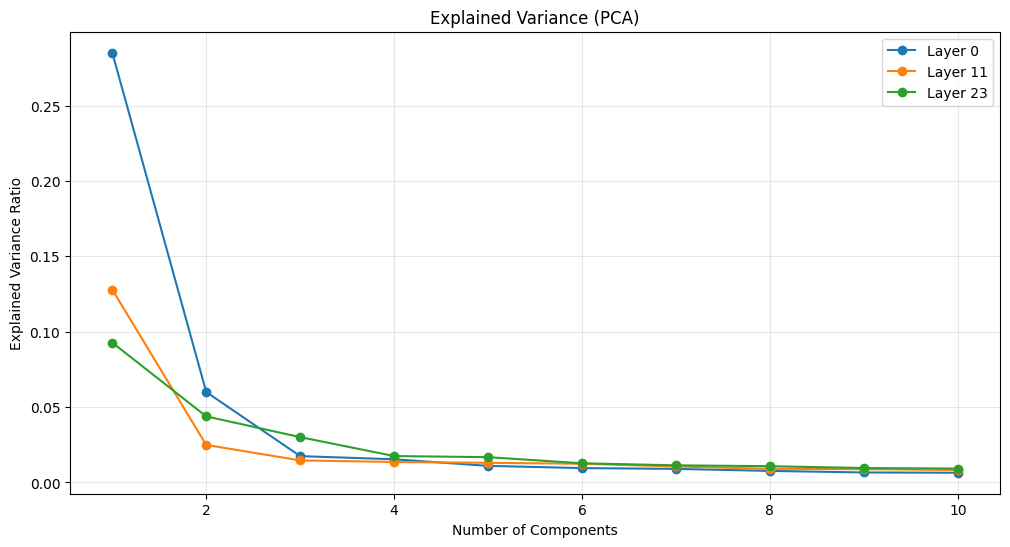

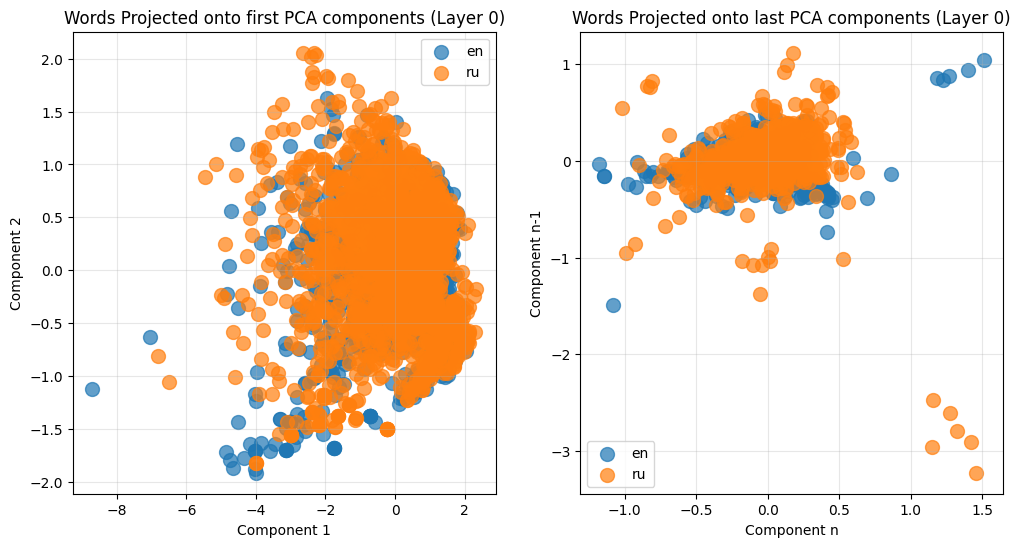

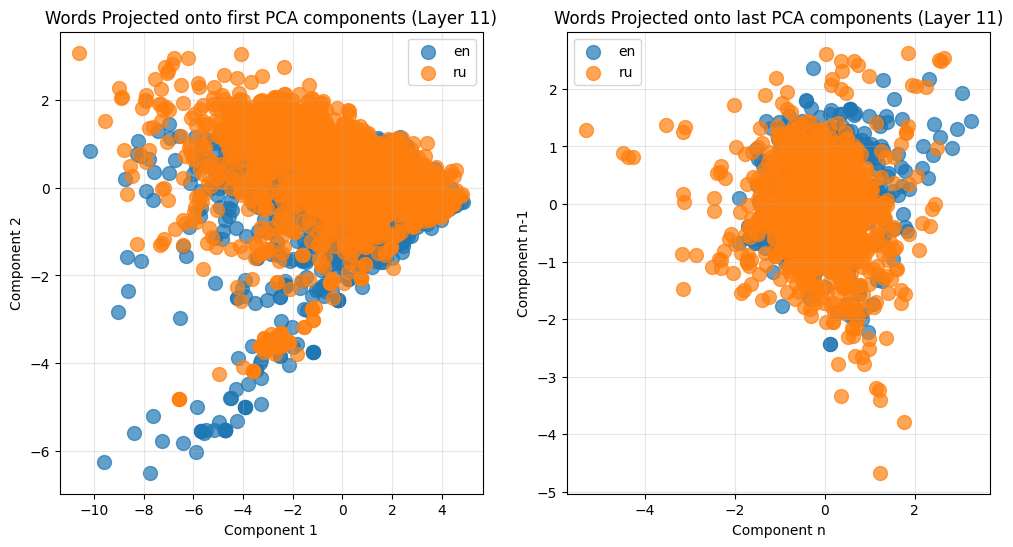

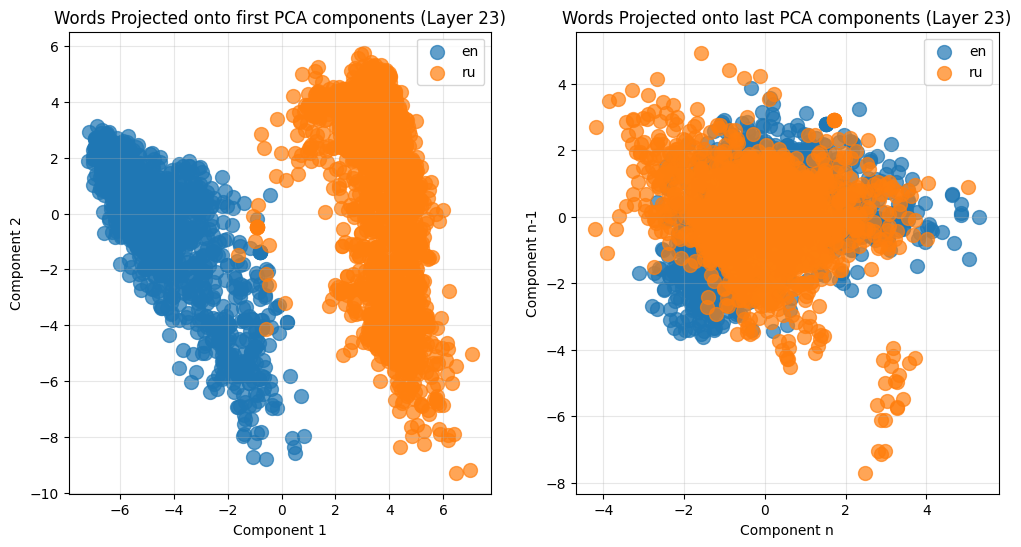

In [6]:
cache = collect_activation_cache(model, subset_opus_books)
find_lexical_subspace_intersection(model, cache)